<a href="https://colab.research.google.com/github/mtermor/NTIC_DeepLearning/blob/main/CNN/OCR_with_OpenCV_and_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Optical Character Recognition (OCR)

Optical Character Recognition, or OCR, is a technology used to convert different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. OCR is widely used for digitizing printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as machine translation, text-to-speech, and data mining.

## Challenges in OCR
OCR is not always straightforward due to various challenges, such as:

1. **Font Variability:** Different font styles and sizes can affect the OCR accuracy.
2. **Background Noise:** Images with noisy backgrounds can make text detection difficult.
3. **Layout and Formatting:** Complex layouts with columns, boxes, and other formatting elements can complicate text extraction.
4. **Image Quality:** Low resolution or blurry images can lead to poor OCR results.

## Tesseract OCR

Tesseract is an open-source OCR engine. It can read and recognize text in various languages and is widely regarded as one of the most accurate free OCR engines available.

### Key Functions of Tesseract

1. **Text Detection:** Identifying and extracting textual content from images.
2. **Language Support:** Recognizing multiple languages.
3. **Customization:** Ability to train Tesseract for new fonts or languages.

## Using Tesseract with OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It can be used in conjunction with Tesseract to preprocess images for better OCR results.


### Installing Required Libraries


#### Install Tesseract OCR

First, you need to check if Tesseract OCR is installed on your system.

- **For Windows:**
  - Download the installer from [Tesseract at UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki).
  - Run the installer and remember the path where you install Tesseract (e.g., `C:\Program Files\Tesseract-OCR`).
  - You will need this path to set the environment variable.

- **For macOS:**
  - You can install Tesseract using Homebrew with the command: `brew install tesseract`.

- **For Linux:**
  - Use the package manager to install Tesseract. For example, on Ubuntu, you can use `sudo apt-get install tesseract-ocr`.

#### Set the PATH Environment Variable

If Tesseract is installed but not found, you might need to add its installation directory to your system's PATH.

- **For Windows:**
  - Go to the Control Panel -> System and Security -> System -> Advanced system settings -> Environment Variables.
  - Under System Variables, find and select the variable named PATH, then click Edit.
  - Add the path to the Tesseract installation directory (e.g., `C:\Program Files\Tesseract-OCR`).
  - Click OK to save the changes.

- **For macOS and Linux:**
  - The Tesseract path is usually added to the system PATH automatically. If not, you can add it by modifying the `.bashrc` or `.zshrc` file in your home directory with the command like `export PATH=$PATH:/usr/local/bin/tesseract` (adjust the path as necessary).

#### Specify the Path in Your Python Code

Alternatively, you can specify the path to the Tesseract executable directly in your Python code:

```python
import pytesseract

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path

# Rest of your code
```

Replace `C:\Program Files\Tesseract-OCR\tesseract.exe` with the actual path where Tesseract OCR is installed on your system.


```python
!pip install opencv-python
!pip install pytesseract
```

### Basic OCR Example


In [2]:
!pip install opencv-python
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,865 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

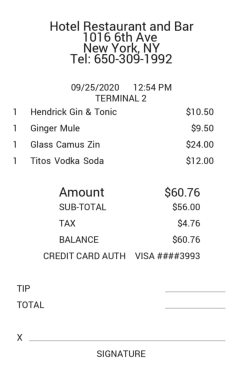

In [3]:
import cv2
import urllib
import pytesseract
import matplotlib.pyplot as plt

url = "https://github.com/ezponda/intro_deep_learning/blob/main/images/restaurant-bar-receipt-sample.jpg?raw=true"
urllib.request.urlretrieve(url, "restaurant-bar-receipt-sample.jpg")

# Path to the image
image_path = "restaurant-bar-receipt-sample.jpg"
# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## `pytesseract.image_to_string`
The function takes an image as input and returns the text contained within that image as a string. It's important to preprocess the image to improve OCR accuracy.

In [4]:
text = pytesseract.image_to_string(image)
print(text)

Hotel Restaurant and Bar
6th Ave
New York, NY
Tel: 650-309-1992

09/25/2020 12:54PM

TERMINAL 2
Hendrick Gin & Tonic $10.50
Ginger Mule $9.50
Glass Camus Zin $24.00
Titos Vodka Soda $12.00
Amount $60.76
SUB-TOTAL $56.00
TAX $4.76
BALANCE $60.76

CREDIT CARD AUTH VISA ####3993

TIP
TOTAL

 

SIGNATURE



## Tesseract OCR Options

Tesseract provides several command-line options that can be used to optimize its OCR capabilities. These include specifying the tessdata path, language, page segmentation modes (PSM), and OCR Engine modes (OEM), among others. Let's explore some of these options:

#### Tessdata Directory
- `--tessdata-dir PATH`: Sets the location of the tessdata directory containing language files and other data.

#### Language Options
- `-l LANG[+LANG]`: Sets the language(s) for OCR. Tesseract supports multiple languages, and you can specify more than one language separated by a plus sign.

#### Config Variables
- `-c VAR=VALUE`: Sets various configuration variables. You can use multiple `-c` arguments.

#### Page Segmentation Modes (PSM)
Tesseract offers different page segmentation modes suitable for various image layouts:
1. `0`: Orientation and script detection (OSD) only.
2. `1`: Automatic page segmentation with OSD.
3. `3`: Fully automatic page segmentation, but no OSD. (Default)
4. `4`: Assume a single column of text of variable sizes.
5. `6`: Assume a single uniform block of text.
6. `7`: Treat the image as a single text line.
7. `8`: Treat the image as a single word.
8. `10`: Treat the image as a single character.
9. `11`: Sparse text. Find as much text as possible in no particular order.

#### OCR Engine Modes (OEM)
Tesseract has different OCR engine modes:
1. `0`: Legacy engine only.
2. `1`: Neural nets LSTM engine only.
3. `2`: Legacy + LSTM engines.
4. `3`: Default, based on what is available.


In [10]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


### Question 1: Use the correct PSM mode for extracting the tex in the next image

```python
config = '--psm <PSM mode>'

text = pytesseract.image_to_string(image, config=config)
```

`PSM mode` can be `0, 1, ..., 11`

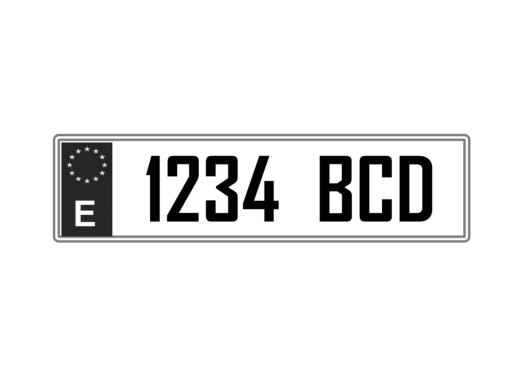

In [5]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/car_plate.png?raw=true'
urllib.request.urlretrieve(url, "car_plate.png")


image_1 = cv2.imread("car_plate.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image_1, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# Sin decir en que modo debe buscar la imagen
text = pytesseract.image_to_string(image_1)
print(text)

### Question 1: Change the `config` parameter

In [12]:
config = '--psm <0>'

text = pytesseract.image_to_string(image_1, config = config)
print(text)

TesseractError: (1, 'Tesseract Open Source OCR Engine v4.1.1 with Leptonica Warning: Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 1701 Too few characters. Skipping this page Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')